In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/ML_A3/

/content/drive/MyDrive/ML_A3


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import Dataset


import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import copy

In [ ]:
import torch.utils.data as data_utils

In [ ]:
df = pd.read_csv("largeTrain.csv")
dataset = df.to_numpy()
X_train = dataset[:, 1:]
y_train = dataset[:, 0]


In [ ]:
df = pd.read_csv("largeValidation.csv")
testset = df.to_numpy()
X_test = testset[:, 1:]
y_test = testset[:, 0]

In [ ]:
class CustomDataset(Dataset):
    """
    Class for feeding custom dataset to pytorch.
    """
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype = torch.float32)
        self.y = torch.tensor(y)
         
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        return (self.X[i], self.y[i])


In [ ]:
mean = X_train.mean()
std = X_train.std()

In [ ]:
train_data = CustomDataset(X_train, y_train)
test_data = CustomDataset(X_test, y_test)

In [ ]:
train_iterator = data_utils.DataLoader(train_data, batch_size = 128, shuffle=True)

In [ ]:
test_iterator = data_utils.DataLoader(test_data, batch_size = 128, shuffle=True)

In [ ]:
class MLP(nn.Module):
    """ Class for neural network implementation"""
    def __init__(self, input_dim, output_dim, num_neurons):
        super().__init__()
                
        self.input_to_hidden = nn.Linear(input_dim, num_neurons)
        self.hidden_to_output = nn.Linear(num_neurons, output_dim)
        
    def forward(self, x):
        
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)                
        h_1 = F.relu(self.input_to_hidden(x))
        y_pred = self.hidden_to_output(h_1)
        
        return y_pred, h_1

In [ ]:
input_dimensions = len(X_train[0])
output_dimensions = 10


In [ ]:
def train(model, iterator, optimizer, criterion, device):
    """
    Trains model and returns loss
    """
    
    epoch_loss = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        y_pred, _ = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion, device):
    """
    Returns loss for the given iterator by the input model
    """
    
    epoch_loss = 0
    model.eval()
    
    with torch.no_grad():
    
        for (x, y) in iterator:
            x = x.to(device)
            y = y.to(device)
            y_pred, _ = model(x)
            loss = criterion(y_pred, y)
            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [ ]:
# code for plotting loss vs no. of hidden units
hidden_units_list = [5, 20, 50, 100, 200]
train_loss_values = []
val_loss_values = []
for num in hidden_units_list:
  model = MLP(input_dimensions, output_dimensions, num)
  optimizer = optim.Adam(model.parameters(), lr = 0.01)
  criterion = nn.CrossEntropyLoss()
  device = torch.device('cpu')
  model = model.to(device)
  criterion = criterion.to(device)
  num_epochs = 100

  for i in range(num_epochs):
      train_loss = train(model, train_iterator, optimizer, criterion, device)
      
  train_loss = evaluate(model, train_iterator, criterion, device)
  val_loss = evaluate(model, test_iterator, criterion, device)
  print("Train Loss: " + str(train_loss) + ", Validation Loss: " +  str(val_loss))
  train_loss_values.append(train_loss)
  val_loss_values.append(val_loss)



Train Loss: 0.5200503120120142, Validation Loss: 0.6656327284872532
Train Loss: 0.09059483143435397, Validation Loss: 1.278758630156517
Train Loss: 0.019939468798070202, Validation Loss: 1.052322007715702
Train Loss: 0.1888615146384273, Validation Loss: 1.149270385503769
Train Loss: 0.07588706808295888, Validation Loss: 1.203445129096508


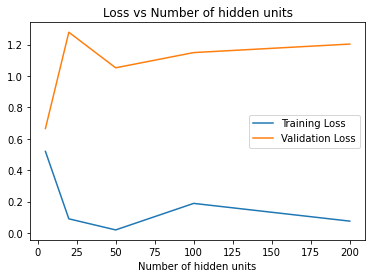

In [ ]:
plt.plot(hidden_units_list, train_loss_values, label = "Training Loss")
plt.plot(hidden_units_list, val_loss_values, label = "Validation Loss")
plt.legend()
plt.xlabel("Number of hidden units")
plt.title("Loss vs Number of hidden units")
plt.show()

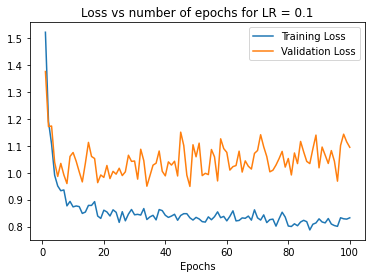

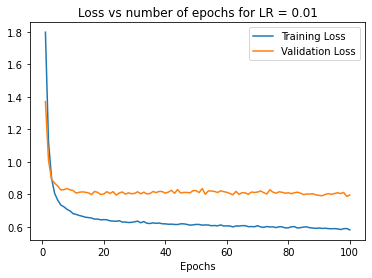

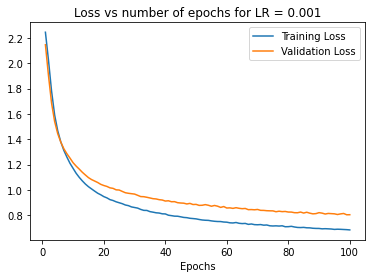

In [ ]:
# code for plotting loss vs no. of epochs for different learning rates
lr_list = [0.1, 0.01, 0.001]
for num in lr_list:
  model = MLP(input_dimensions, output_dimensions, 4)
  optimizer = optim.Adam(model.parameters(), lr = num)
  criterion = nn.CrossEntropyLoss()
  device = torch.device('cpu')
  model = model.to(device)
  criterion = criterion.to(device)
  num_epochs = 100
  
  train_loss_values = []
  val_loss_values = []

  for i in range(num_epochs):
    train_loss = train(model, train_iterator, optimizer, criterion, device)  
    val_loss = evaluate(model, test_iterator, criterion, device)
    train_loss_values.append(train_loss)
    val_loss_values.append(val_loss)
  
  plt.plot(list(range(1,num_epochs+1)), train_loss_values, label = "Training Loss")
  plt.plot(list(range(1,num_epochs+1)), val_loss_values, label = "Validation Loss")
  plt.legend()
  plt.xlabel("Epochs")
  plt.title("Loss vs number of epochs for LR = " + str(num))
  plt.show()

  

